Unsupervised learning addresses a different sort of problem. Here the data has no labels, and we are interested in finding similarities between the objects in question. In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself. Unsupervised learning comprises tasks such as dimensionality reduction, clustering, and density estimation. For example, in the iris data discussed above, we can used unsupervised methods to determine combinations of the measurements which best display the structure of the data. As we'll see below, such a projection of the data can be used to visualize the four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:
given detailed observations of distant galaxies, determine which features or combinations of features best summarize the information.
given a mixture of two sound sources (for example, a person talking over some music), separate the two (this is called the blind source separation problem).
given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.
Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print(f'Reduced dataset shape: {X_reduced.shape}')

Reduced dataset shape: (150, 2)


In [ ]:
Now that we have reduced the number of dimensions in the iris dataset to 2, we can visualize them with a single 2D plot:

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


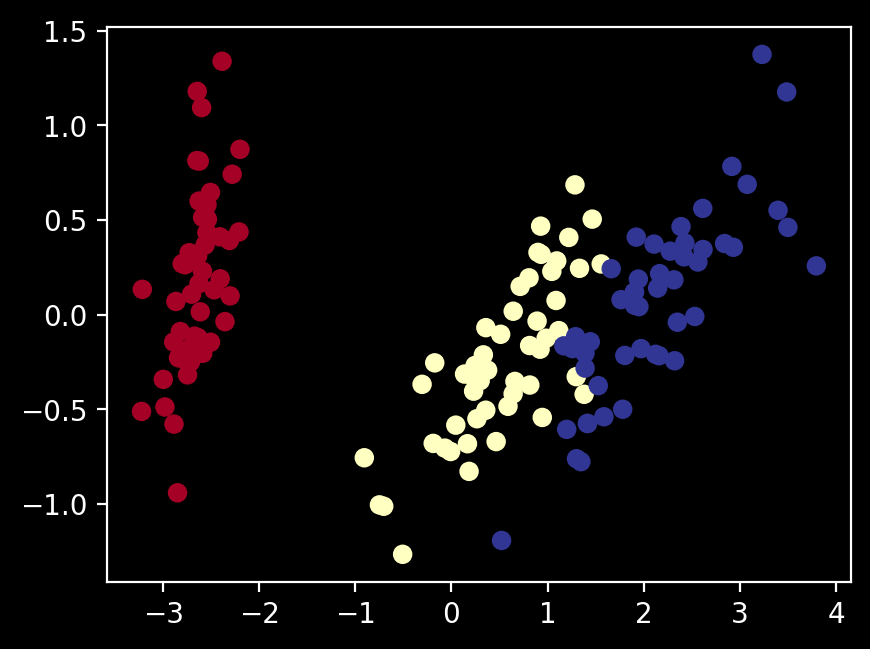

In [6]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
        for value, name in zip(component, iris.feature_names)
    ))

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.
Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.
In order to visualize the results using a 2D plot, we will use the post-PCA data points with reduced dimensions from the previous page, and color them using class predictions from the K-means:

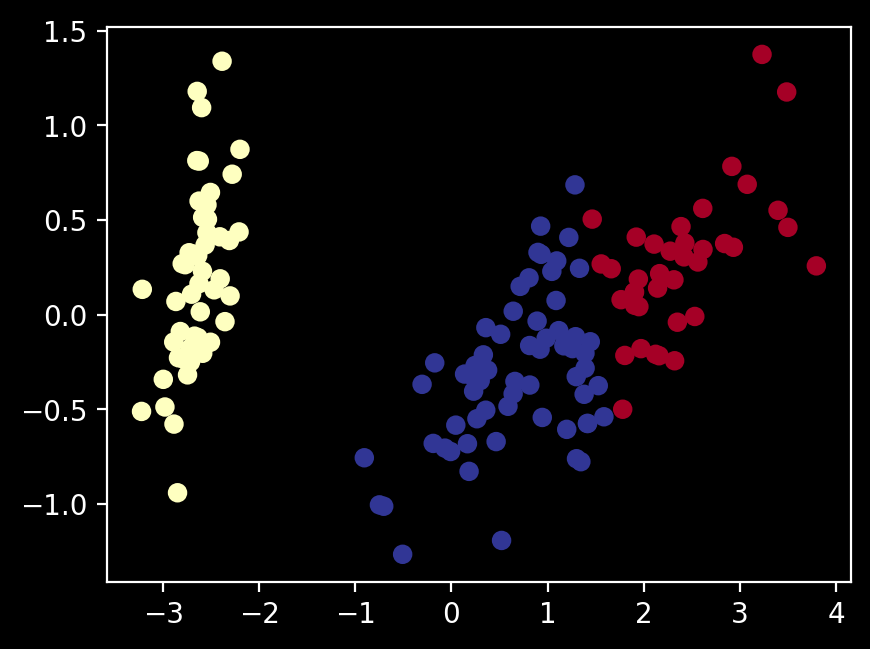

In [7]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='RdYlBu');

If you compare both plots, you will find that although K-means did get a lot of the predictions right, it failed to correctly separate classes in the right cluster.